In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import math

In [13]:
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('data/telco_churn.csv', na_values=[' '])

In [4]:
df.columns = [c[0].lower() + c[1:] for c in df.columns]
df['label'] = df['churn'].map({'Yes': 0, 'No': 1})
df['seniorCitizen'] = df['seniorCitizen'].map({1: 'Yes', 0: 'No'})
df.drop(['customerID', 'churn'], axis=1, inplace=True)

In [5]:
df.sample(5)

,gender,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,label
5075,Female,No,Yes,Yes,42,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.15,3875.40,1
6029,Male,No,No,No,4,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,Month-to-month,Yes,Mailed check,94.90,360.55,1
6228,Male,No,No,Yes,70,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),64.95,4551.50,1
19,Female,No,No,No,21,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.90,1
3220,Male,No,Yes,No,70,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),77.30,5498.20,1


In [7]:
def eda_categorical(data, variable, ax=None):
    variable_df = data[variable].value_counts(normalize=True).reset_index()
    n_colors = len(variable_df)
    variable_df.set_index('index').T.plot(kind='barh',
                                        stacked=True,
                                        colormap=ListedColormap(sns.color_palette("Set2", n_colors)),
                                        width=0.15, ax=ax)

def multiple_eda_categorical(data, list_categorical):
    n_rows = math.ceil(len(list_categorical)/2)
    fig = plt.figure(figsize=(12,n_rows*3))

    for i, variable in enumerate(list_categorical):
        ax = fig.add_subplot(n_rows,2,i+1)
        eda_categorical(data, variable, ax=ax)
    
    plt.tight_layout()
    plt.show()

def multiple_eda_continuous(data, list_continuous):
    n_rows = math.ceil(len(list_continuous)/3)
    fig = plt.figure(figsize=(12,n_rows*5))
    palette = sns.color_palette('Set2', 3)

    for i, variable in enumerate(list_continuous):
        ax = fig.add_subplot(n_rows,3,i+1)
        sns.boxplot(x=variable, data=data, orient='v', palette=[palette[i]], ax=ax)
        ax.set_ylabel('')
        ax.set_title(variable)

    plt.tight_layout()
    plt.show()

In [6]:
continuous, categorical = [], []
black_list = ['onlineSecurity', 'techSupport', 'onlineBackup', 'streamingTV', 'streamingMovies', 'deviceProtection']

for col in [c for c in df.columns if c not in black_list and c != 'label']:
    if is_numeric_dtype(df[col]):
        continuous.append(col)
    else:
        categorical.append(col)

## Exploratory Analysis

In [18]:
n = len(df)
n_not_churn = sum(df['label'])
n_churn = n - n_not_churn

print('Dataset contains %d records' % (n))
print('Number of customers who churned: %d (%0.2f%%)' % (n_churn, n_churn*100/n))

Dataset contains 7043 records
Number of customers who churned: 1869 (26.54%)


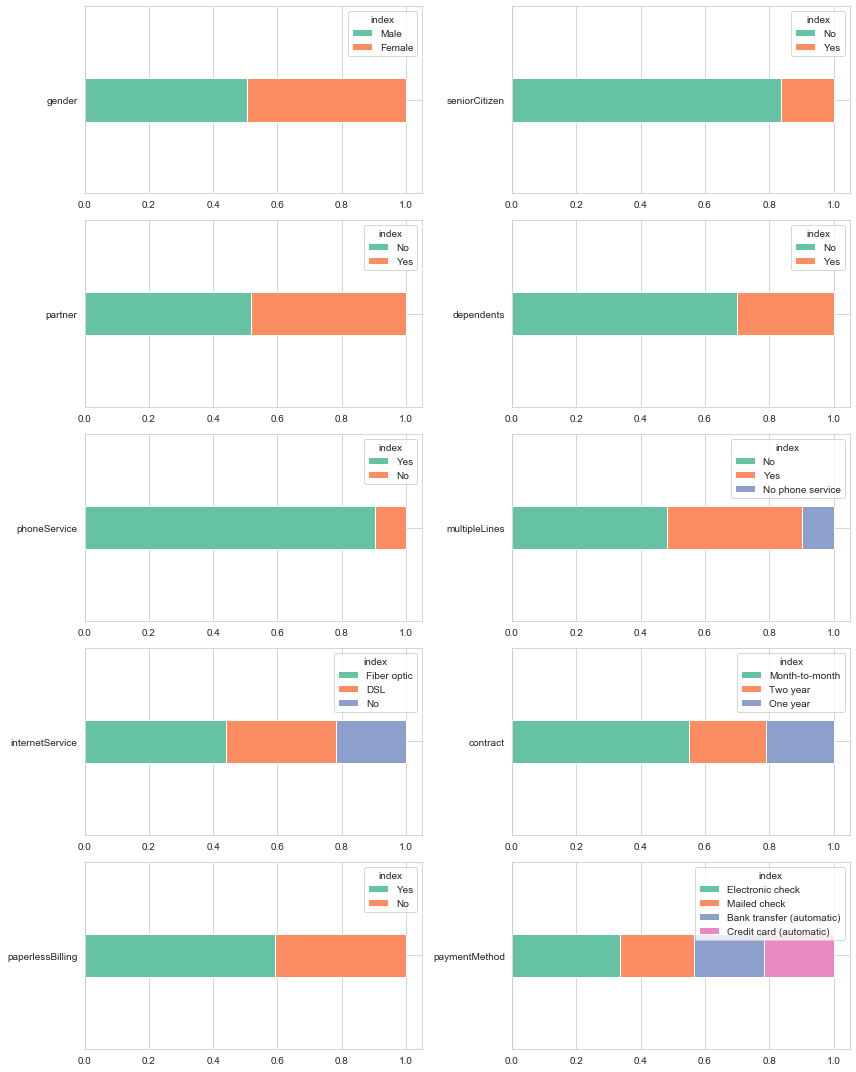

In [8]:
multiple_eda_categorical(df, categorical)

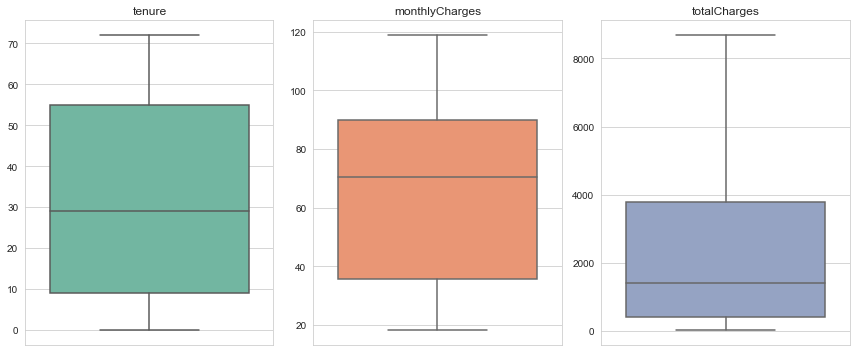

In [9]:
multiple_eda_continuous(df, continuous)